In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [177]:
dataset = pd.read_csv('Bucharest_HousePriceDataset.csv')
dataset.head()

,Nr Camere,Suprafata,Etaj,Total Etaje,Sector,Scor,Pret
0,4,108.00,2,3,4,5,83000
1,1,41.00,1,8,1,1,39900
2,3,63.52,1,3,2,3,84900
3,1,33.00,3,10,5,1,45500
4,2,62.00,5,9,5,5,54900


In [178]:
dataset.shape

(3529, 7)

In [179]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3529 entries, 0 to 3528
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nr Camere    3529 non-null   int64  
 1   Suprafata    3529 non-null   float64
 2   Etaj         3529 non-null   int64  
 3   Total Etaje  3529 non-null   int64  
 4   Sector       3529 non-null   int64  
 5   Scor         3529 non-null   int64  
 6   Pret         3529 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 193.1 KB


In [180]:
dataset.describe()

,Nr Camere,Suprafata,Etaj,Total Etaje,Sector,Scor,Pret
count,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000,3529.000000
mean,2.464154,69.812454,3.089544,6.427317,2.936243,3.098045,97846.330689
std,0.882514,29.086956,2.733418,3.156608,1.724560,1.442990,62844.200384
min,1.000000,16.000000,-1.000000,1.000000,1.000000,1.000000,19500.000000
25%,2.000000,52.000000,1.000000,4.000000,1.000000,2.000000,58400.000000
50%,2.000000,63.000000,2.000000,6.000000,3.000000,4.000000,78600.000000
75%,3.000000,81.000000,4.000000,9.000000,4.000000,4.000000,117500.000000
max,9.000000,350.000000,20.000000,24.000000,6.000000,5.000000,495000.000000


<AxesSubplot: >

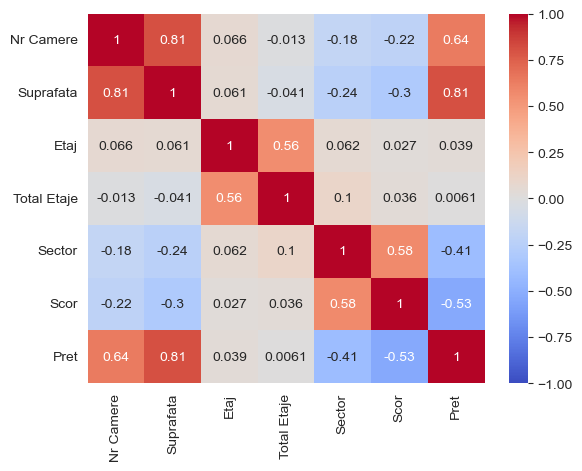

In [181]:
sns.heatmap(data=dataset.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)

In [182]:
dataset.drop(['Scor'],axis =1, inplace=True)
dataset.drop(['Sector'],axis =1, inplace=True)
#########
dataset.drop(['Etaj'],axis =1, inplace=True)
dataset.drop(['Total Etaje'],axis =1, inplace=True)

In [183]:
#dealing with missing values
dataset.isnull().any()

Nr Camere    False
Suprafata    False
Pret         False
dtype: bool

In [184]:
# dataset['Nr Camere'].unique()
# dataset['Etaj'].unique()
# dataset['Total Etaje'].unique()

In [185]:
dataset2 = pd.get_dummies(data=dataset,columns=['Nr Camere'],drop_first=True)

In [205]:
dataset_poly = pd.get_dummies(data=dataset,columns=['Nr Camere'],drop_first=True)

In [187]:
dataset_knn = pd.get_dummies(data=dataset,columns=['Nr Camere'],drop_first=True)

In [188]:
dataset2.head()

,Suprafata,Pret,Nr Camere_2,Nr Camere_3,Nr Camere_4,Nr Camere_5,Nr Camere_6,Nr Camere_7,Nr Camere_8,Nr Camere_9
0,108.00,83000,0,0,1,0,0,0,0,0
1,41.00,39900,0,0,0,0,0,0,0,0
2,63.52,84900,0,1,0,0,0,0,0,0
3,33.00,45500,0,0,0,0,0,0,0,0
4,62.00,54900,1,0,0,0,0,0,0,0


In [189]:
dataset2.shape

(3529, 10)

<AxesSubplot: ylabel='Suprafata'>

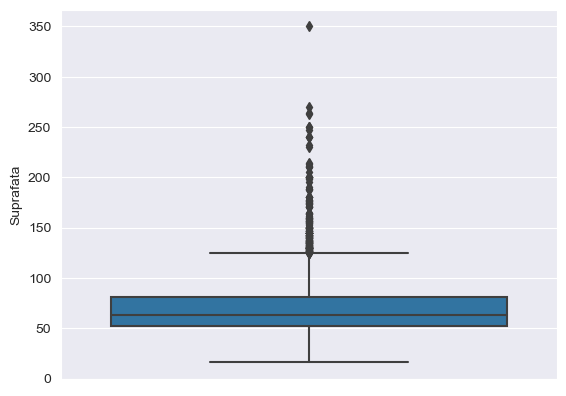

In [190]:
sns.boxplot(y=dataset2['Suprafata'])

<AxesSubplot: ylabel='Suprafata'>

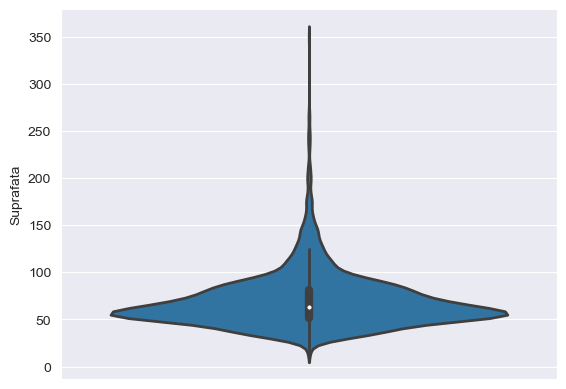

In [191]:
sns.violinplot(y=dataset2['Suprafata'],linewidth=2)

<AxesSubplot: xlabel='Suprafata', ylabel='Count'>

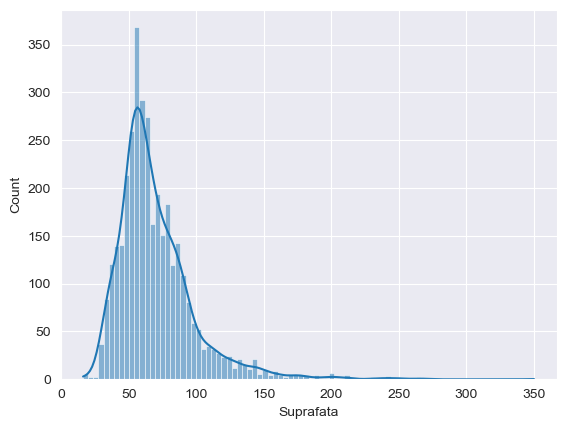

In [192]:
sns.histplot(x=dataset2['Suprafata'],kde=True)

<AxesSubplot: ylabel='Suprafata'>

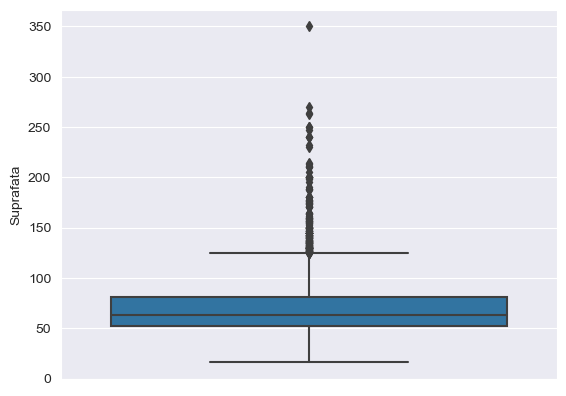

In [193]:
sns.boxplot(y=dataset2['Suprafata'])

In [194]:
# log normalization - correct the skewness
dataset2['Suprafata'] = np.log(dataset2['Suprafata'])

In [195]:
# standardazation => mean = 0, std = 1
dataset2['Suprafata'] = (dataset2['Suprafata'] - dataset2['Suprafata'].mean())/dataset2['Suprafata'].std()

In [196]:
#outliers
z = np.abs(stats.zscore(dataset2['Suprafata']))
z

0       1.387179
1       1.265077
2       0.066274
3       1.859477
4       0.132598
          ...   
3524    1.230659
3525    1.064647
3526    1.698351
3527    0.222388
3528    0.565387
Name: Suprafata, Length: 3529, dtype: float64

In [197]:
# outliers_index = np.where(np.abs(z)>3)
outliers = dataset2[z>3]
outliers

,Suprafata,Pret,Nr Camere_2,Nr Camere_3,Nr Camere_4,Nr Camere_5,Nr Camere_6,Nr Camere_7,Nr Camere_8,Nr Camere_9
17,3.074078,181500,0,0,1,0,0,0,0,0
77,3.651983,213900,0,0,1,0,0,0,0,0
224,3.141685,248000,0,0,1,0,0,0,0,0
339,3.207664,299900,0,0,0,0,0,1,0,0
428,3.064478,248000,0,0,1,0,0,0,0,0
494,3.823833,495000,0,0,1,0,0,0,0,0
610,3.685037,360000,0,0,0,1,0,0,0,0
665,-3.841277,19905,0,0,0,0,0,0,0,0
865,3.074078,238000,0,1,0,0,0,0,0,0
1038,3.053466,435000,0,0,0,1,0,0,0,0


In [198]:
dataset2.drop(outliers.index,inplace=True)

<AxesSubplot: xlabel='Suprafata', ylabel='Count'>

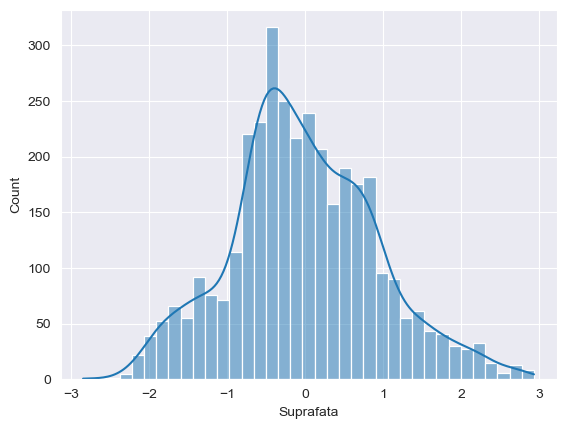

In [199]:
sns.histplot(x=dataset2['Suprafata'],kde=True)

((array([-3.54240382, -3.30128574, -3.16808798, ...,  3.16808798,
          3.30128574,  3.54240382]),
  array([-2.8476547 , -2.66352051, -2.40864225, ...,  2.90466523,
          2.90757641,  2.93363867])),
 (0.9431263770313195, -0.018016539778653928, 0.9962946618638265))

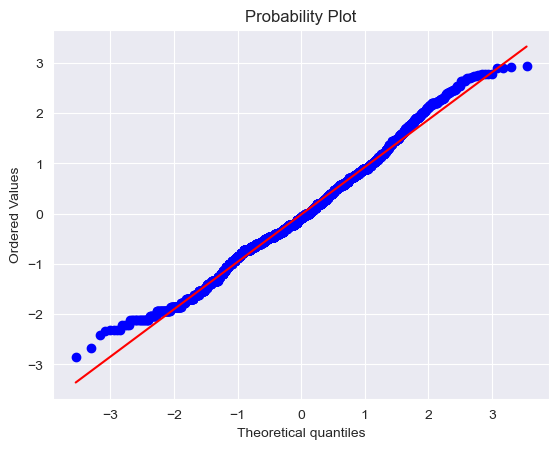

In [200]:
stats.probplot(x=dataset2['Suprafata'],plot=plt)

#Spliting data in test data and training data

In [201]:
X = dataset2.drop(['Pret'],axis = 1)
Y = dataset2['Pret']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=0,test_size=.2)
y_train.shape
y_test.shape

(700,)

###########Trying models###########
######Linear Regression#######

In [202]:
from sklearn.linear_model import LinearRegression
model_linear_reg = LinearRegression()
model_linear_reg.fit(x_train,y_train)

LinearRegression()

In [203]:
y_predict = model_linear_reg.predict(x_test)

In [204]:
from sklearn import metrics
metrics.r2_score(y_test,y_predict)
# metrics.mean_squared_error(y_test,y_predict)

0.5455419306654155

#######Example of price prediction for a house#########

In [28]:
input_test = {'Suprafata':52,'Nr Camere': 2,'Etaj':0,'Total Etaje':10,'Sector':1}
input_formatat = pd.DataFrame()
input_formatat = X.iloc[[0]]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
input_formatat['Suprafata'] = input_test['Suprafata']
# input_formatat['Suprafata'] = (input_formatat['Suprafata']-dataset3['Suprafata'].mean())/dataset3['Suprafata'].std()
input_formatat['Suprafata'] = scaler.fit_transform(input_formatat[['Suprafata']])
for i in range(0,dataset['Nr Camere'].max()+1):
    if i == input_test['Nr Camere']:
        s = 'Nr Camere_'
        s += str(input_test['Nr Camere'])
        input_formatat[s] = 1
    else:
        s = 'Nr Camere_'
        s += str(i)
        input_formatat[s] = 0

for i in range(0,dataset['Etaj'].max()+1):
    if i == input_test['Etaj']:
        s = 'Etaj_'
        s += str(input_test['Etaj'])
        input_formatat[s] = 1
    else:
        s = 'Etaj_'
        s += str(i)
        input_formatat[s] = 0

for i in range(0,dataset['Total Etaje'].max()+1):
    if i == input_test['Total Etaje']:
        s = 'Total Etaje_'
        s += str(input_test['Total Etaje'])
        input_formatat[s] = 1
    else:
        s = 'Total Etaje_'
        s += str(i)
        input_formatat[s] = 0

C:\Users\acer\AppData\Local\Temp\ipykernel_9824\945572356.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_formatat['Suprafata'] = input_test['Suprafata']
C:\Users\acer\AppData\Local\Temp\ipykernel_9824\945572356.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_formatat['Suprafata'] = scaler.fit_transform(input_formatat[['Suprafata']])
C:\Users\acer\AppData\Local\Temp\ipykernel_9824\945572356.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [29]:
for col in input_formatat.columns:
    if col not in x_test.columns:
        input_formatat.drop(columns=col,inplace=True,axis=1)

C:\Users\acer\AppData\Local\Temp\ipykernel_9824\2627999688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_formatat.drop(columns=col,inplace=True,axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_9824\2627999688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_formatat.drop(columns=col,inplace=True,axis=1)
C:\Users\acer\AppData\Local\Temp\ipykernel_9824\2627999688.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [30]:
x_test.shape

(706, 45)

In [31]:
input_formatat

,Suprafata,Nr Camere_2,Nr Camere_3,Nr Camere_4,Nr Camere_5,Nr Camere_6,Nr Camere_7,Nr Camere_8,Nr Camere_9,Etaj_0,...,Total Etaje_10,Total Etaje_11,Total Etaje_12,Total Etaje_13,Total Etaje_14,Total Etaje_15,Total Etaje_16,Total Etaje_17,Total Etaje_18,Total Etaje_24
0,0.0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [32]:
output_test = model_linear_reg.predict(input_formatat)

In [33]:
output_test

array([97309.98520693])

###########Polynomial Regression Model##############

In [221]:
Y = dataset['Pret']
X = dataset.drop(['Pret'],axis=1)
from sklearn.model_selection import train_test_split
x_train_poly,x_test_poly,y_train_poly,y_test_poly = train_test_split(X,Y,random_state=0,train_size=0.2)
# degree of the regression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly_2 = poly.fit_transform(x_train_poly)
x_test_poly_2 = poly.fit_transform(x_test_poly)
from sklearn.linear_model import LinearRegression
model_poly = LinearRegression()
model_poly.fit(x_train_poly_2,y_train_poly)
y_predict_poly = model_poly.predict(x_test_poly_2)

In [222]:
metrics.r2_score(y_test_poly,y_predict_poly)

0.6513357076373297

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataset_knn['Suprafata'] = scaler.fit_transform(dataset_knn[['Suprafata']])
X = dataset_knn.drop(['Pret'],axis=1)
Y = dataset_knn['Pret']

In [209]:
x_train_knn,x_test_knn,y_train_knn,y_test_knn = train_test_split(X,Y,random_state=0,train_size=0.2)
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=15)
model_knn.fit(x_train_knn,y_train_knn)

KNeighborsRegressor(n_neighbors=15)

In [210]:
y_predict_knn = model_knn.predict(x_test_knn)

In [211]:
metrics.r2_score(y_test_knn,y_predict_knn)

0.6362156765939591

In [212]:
metrics.mean_squared_error(y_test_knn,y_predict_knn) # loss function

1479242764.9869974

#####Hyperparameters Fine_Tuning########

In [213]:
x_train_knn.head()

,Suprafata,Nr Camere_2,Nr Camere_3,Nr Camere_4,Nr Camere_5,Nr Camere_6,Nr Camere_7,Nr Camere_8,Nr Camere_9
1938,-1.064974,0,0,0,0,0,0,0,0
673,1.966368,0,1,0,0,0,0,0,0
2712,0.006449,0,1,0,0,0,0,0,0
1201,0.281525,0,1,0,0,0,0,0,0
3164,-0.474935,1,0,0,0,0,0,0,0


In [214]:
from sklearn.model_selection import GridSearchCV
mod = KNeighborsRegressor()
params_grid = {'n_neighbors' : [3,5,7,8,9,10,11,12,15,20,30],
                'weights': ['uniform','distance',None],
                'algorithm' : ['auto','ball_tree', 'kd_tree','brute'],
                'p': [2,3,4,10,45]
                }
grid_search = GridSearchCV(estimator=model_knn,param_grid=params_grid,cv=5)
grid_search.fit(x_train_knn,y_train_knn)
print(grid_search.best_params_)
print(grid_search.best_index_)
print(grid_search.best_score_)

{'algorithm': 'auto', 'n_neighbors': 12, 'p': 2, 'weights': 'uniform'}
105
0.6266048578579685


########Tuned KNN Model##########

In [223]:
model_knn_tuned = KNeighborsRegressor(algorithm= 'auto', n_neighbors= 12, p= 2, weights= 'uniform')
model_knn_tuned.fit(x_train_knn,y_train_knn)

KNeighborsRegressor(n_neighbors=12)

In [224]:
y_predict_knn_tuned = model_knn_tuned.predict(x_test_knn)

In [225]:
metrics.r2_score(y_test_knn,y_predict_knn_tuned)

0.6388234628630433

######Fine-Tuning linear regression###

In [38]:
from sklearn.model_selection import GridSearchCV
params_grid2 = {'fit_intercept': [True,False],
               'normalize': [True,False]
               }
grid_search = GridSearchCV(estimator=model_linear_reg,param_grid=params_grid2,cv=5)
grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_index_)
print(grid_search.best_score_)

{'fit_intercept': True, 'normalize': True}
0
0.6103853977379587


C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\acer\Anaconda\anaconda3\envs\newConda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sk

In [ ]:
from sklearn.linear_model import Ridge